In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from collections import Counter

ZADANIE 1

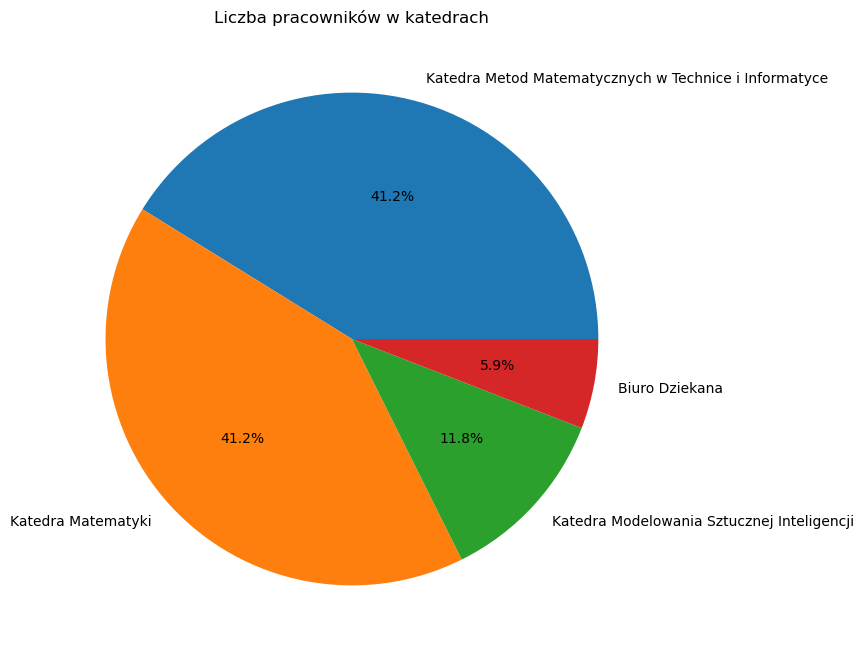

In [2]:
url = "https://ms.polsl.pl/pracownicy.php"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

letters = ['L', 'S']
urls = []

for link in soup.find_all('a'):
    text = link.get_text().strip()
    if text in letters:
        href = link.get('href')
        if not href.startswith('http'):
            href = 'https://ms.polsl.pl/' + href
        urls.append(href)

katedry_pracownicy = {}

for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    for div in soup.find_all('div', class_ = 'pracownik'):
        pracownik = div.find('strong').contents[0].strip()
        katedra = div.find('b').get_text().strip()
        if katedra not in katedry_pracownicy:
            katedry_pracownicy[katedra] = []
        katedry_pracownicy[katedra].append(pracownik)

liczby = [len(pracownicy) for pracownicy in katedry_pracownicy.values()]
nazwy = list(katedry_pracownicy.keys())

plt.figure(figsize = (8,8))
plt.pie(liczby, labels = nazwy, autopct='%1.1f%%')
plt.title("Liczba pracowników w katedrach")
plt.show()


ZADANIE 2

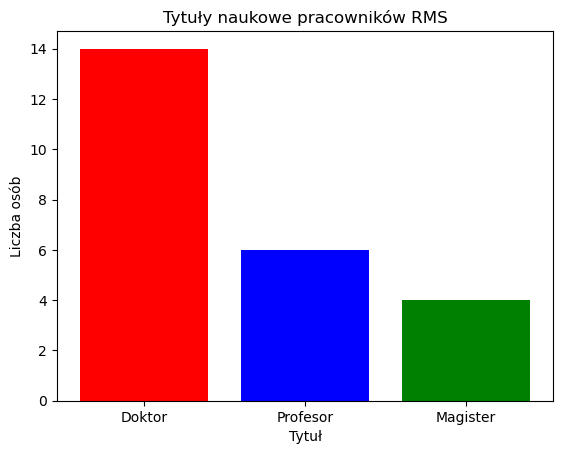

In [10]:
def extract_name(text):
    parts = text.split(',')[0]
    to_delete = ['prof.', 'dr', 'inż.', 'mgr', 'hab.', 'profesor', 'adiunkt', 'magister', 'asystent', 'starszy specjalista administracyjny']
    for tytul in to_delete:
        parts = parts.replace(tytul, '')
    return ' '.join(parts.split()).strip()

url = "https://ms.polsl.pl/kmmti/pracownicy/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

pracownicy = []
for tag in soup.find_all("a"):
    tekst = tag.get_text().strip()
    if any(x in tekst.lower() for x in ["prof.", "dr ", "mgr"]):
        pracownicy.append(tekst)

stopnie = []
for p in pracownicy:
    if 'prof.' in p.lower():
        stopnie.append('Profesor')
    elif 'dr' in p.lower():
        stopnie.append('Doktor')
    elif 'mgr' in p.lower():
        stopnie.append('Magister')

    licznik = Counter(stopnie)

plt.bar(licznik.keys(), licznik.values(), color=['red', 'blue', 'green'])
plt.title("Tytuły naukowe pracowników RMS")
plt.xlabel("Tytuł")
plt.ylabel("Liczba osób")
plt.savefig('wykres.png')
plt.show()

profesorowie = []
doktorzy = []
pozostali = []
for tag in soup.find_all("a"):
    tekst = tag.get_text()
    href = tag.get('href')

    if any(x in tekst.lower() for x in ["prof.", "dr ", "mgr"]):
        name = extract_name(tekst)

        if 'prof.' in tekst.lower():
            profesorowie.append((name, href))
        elif 'dr' in tekst.lower():
            doktorzy.append((name, href))
        elif 'mgr' in tekst.lower():
            pozostali.append((name, href))

soup_html = BeautifulSoup('<html><head></head><body></body></html>', 'html.parser')

meta = soup_html.new_tag('meta', charset='UTF-8')
soup_html.head.append(meta)

title = soup_html.new_tag('title')
title.string = 'Pracownicy Katedry'
soup_html.head.append(title)

h1 = soup_html.new_tag('h1')
h1.string = 'Pracownicy Katedry'
soup_html.body.append(h1)

h2_prof = soup_html.new_tag('h2')
h2_prof.string = 'Profesorowie:'
soup_html.body.append(h2_prof)

ul_prof = soup_html.new_tag('ul')
for imie, link in profesorowie:
    li = soup_html.new_tag('li')
    a = soup_html.new_tag('a', href=link)
    a.string = imie
    li.append(a)
    ul_prof.append(li)
soup_html.body.append(ul_prof)

h2_dr = soup_html.new_tag('h2')
h2_dr.string = 'Doktorzy:'
soup_html.body.append(h2_dr)

ul_dr = soup_html.new_tag('ul')
for imie, link in doktorzy:
    li = soup_html.new_tag('li')
    a = soup_html.new_tag('a', href=link)
    a.string = imie
    li.append(a)
    ul_dr.append(li)
soup_html.body.append(ul_dr)

h2_poz = soup_html.new_tag('h2')
h2_poz.string = 'Pozostali pracownicy:'
soup_html.body.append(h2_poz)

ul_poz = soup_html.new_tag('ul')
for imie, link in pozostali:
    li = soup_html.new_tag('li')
    a = soup_html.new_tag('a', href=link)
    a.string = imie
    li.append(a)
    ul_poz.append(li)
soup_html.body.append(ul_poz)

h2_wykres = soup_html.new_tag('h2')
h2_wykres.string = 'Wykres - zestawienie tytułów naukowych:'
soup_html.body.append(h2_wykres)

img = soup_html.new_tag('img', src='wykres.png', alt='Wykres tytułów naukowych')
soup_html.body.append(img)

with open('pracownicy.html', 'w', encoding='utf-8') as f:
    f.write(soup_html.prettify())


ZADANIE 3